In [1]:
seedNum = 888
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import random
import statsmodels.api as sm
tf.random.set_seed(seedNum)
np.random.seed(seedNum)
import matplotlib.pyplot as plt
from tensorflow import keras
from datetime import datetime
import time
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, f1_score
import sys, os
print(os.getcwd())
os.chdir('c:/Users/lqs/Downloads/DeepCI')
import warnings
warnings.simplefilter('ignore')
import itertools
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, utils, models
from sklearn.model_selection import train_test_split

### import from our files

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import numpy
numpy.set_printoptions(threshold=sys.maxsize)
torch.set_printoptions(threshold=sys.maxsize)

import argparse
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
# ! pip install statsmodels

c:\Users\lqs\Downloads\DeepCI\notebooks


In [2]:

#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255# shape (60000, 28, 28)
X_test  = X_test/255# shape (10000, 28, 28)
(example_X_train,example_y_train) = (X_train[:2000], y_train[:2000])
(example_X_test,example_y_test) = (X_test[:2000], y_test[:2000])


In [3]:
a = y_train
b = X_train

In [4]:
func_run = "sin"
n_epochs = 300
bs = 100
args={}
kwargs={}
args['batch_size']=100
args['test_batch_size']=200
args['epochs']=50  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.0002 #Learning rate is how fast it will decend. 
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=600
args['cuda']= True #

In [5]:
def get_function(func_str):
    if func_str == "abs":
        return (lambda x: (-1+0.4*np.abs(x)).flatten(), 
                lambda x: (-1+0.4*torch.abs(x)).flatten())
    elif func_str == "log":
        return (lambda x: 2*np.log(np.abs(x)).flatten(), 
                lambda x: 2*torch.log(torch.abs(x)).flatten())
    elif func_str == "sin":
        return (lambda x: (0.5+0.5*np.sin(x)).flatten(), 
                lambda x: (0.5+0.5*torch.sin(x)).flatten())
    elif func_str == "none":
        return (lambda x: 0.2*x.flatten(), 
                lambda x: 0.2*torch.Tensor(x).flatten())
    else:
        return (lambda x: np.sign(np.abs(np.abs(x)-5)-2).flatten(), 
                lambda x: torch.sign(torch.abs(torch.abs(x)-5)-2).flatten())

In [6]:
def Simdata(NUM_I,seed,func,rho): #a = y_train/test, b = X_train/test
    
    np.random.seed(seed)    
    X_1_a_j = [] 
    X_2_a_j = [] 
    X_1_a_k = [] 
    X_2_a_k = [] 
    X_1_b_j = [] 
    X_2_b_j = [] 
    X_1_b_k = [] 
    X_2_b_k = []
    Z       = []
    

    X_2_a_j_t = [] 
    X_2_a_k_t = [] 
    X_2_b_j_t = [] 
    X_2_b_k_t = []

    for i in tqdm(range(0,NUM_I)):
        J = np.random.randint(4,10) # number of choice
              
        
        samplea = np.array(random.sample(list(np.arange(a.shape[0])),J)) # a list of index
        samplea = np.expand_dims(samplea, axis=1)
        ej = np.concatenate([a[i] for i in samplea],axis = None) # a list of number on images
        ej = [i for i in ej.tolist()]
        ej = np.float_(ej)

        X_1_a = np.random.uniform(0,2,J) #customer a
        X_2_a = ej #
        X_2_a_pic = [torch.Tensor(b[i]) for i in samplea]
        
        
        
        
        sampleb = np.array(random.sample(list(np.arange(a.shape[0])),J)) # a list of index
        sampleb = np.expand_dims(sampleb, axis=1)
        ej = np.concatenate([a[i] for i in sampleb],axis = None) # a list of number on images
        ej = [i for i in ej.tolist()]
        ej = np.float_(ej)
        
        X_1_b = np.random.uniform(0,2,J) #customer b
        X_2_b = ej
        X_2_b_pic = [torch.Tensor(b[i]) for i in sampleb]
        
        
        
        xi  = np.random.normal(0,0.5,J)    # same across all customers
        
        # X_2_a = X_2_a + rho*xi  #customer a endogeneity remove for now
        # X_2_b = X_2_b + rho*xi  #customer b endogeneity remove for now
        
        u_a   = X_1_a + 2*func(X_2_a) + xi + np.random.normal(0,3,J) # \epsilon_{a} # 3 for score
        u_b   = X_1_b + 2*func(X_2_b) + xi + np.random.normal(0,3,J) # \epsilon_{b}
        
        choice_j = np.argmax(u_a) # return the index of product in the sample that customer a chose, we assume customer a as choose j
        choice_k = np.argmax(u_b) # return the index of product in the sample that customer b chose, we assume customer b as choose k
               
        if choice_j == choice_k:
            continue
        else:  

            X_1_a_j.append(X_1_a[choice_j])
            X_2_a_j.append(X_2_a_pic[choice_j])
            X_1_a_k.append(X_1_a[choice_k])
            X_2_a_k.append(X_2_a_pic[choice_k])
            
            X_1_b_j.append(X_1_b[choice_j]) 
            X_2_b_j.append(X_2_b_pic[choice_j]) 
            X_1_b_k.append(X_1_b[choice_k]) 
            X_2_b_k.append(X_2_b_pic[choice_k])
            
            
            
            X_2_a_j_t.append(X_2_a[choice_j])
            X_2_a_k_t.append(X_2_a[choice_k])             
            X_2_b_j_t.append(X_2_b[choice_j]) 
            X_2_b_k_t.append(X_2_b[choice_k])
            #Z.append(np.array([X_1_a[choice_j], X_2_a[choice_j], X_1_a[choice_k], X_2_a[choice_k],X_1_b[choice_j], X_2_b[choice_j], X_1_b[choice_k], X_2_b[choice_k]]))
            Z.append(np.array([X_1_a[choice_j],X_1_a[choice_k],X_1_b[choice_j],X_1_b[choice_k]]))
            
    X_2_a_j = torch.cat(X_2_a_j, out=torch.Tensor(len(X_2_a_j), 28, 28))
    X_2_a_k = torch.cat(X_2_a_k, out=torch.Tensor(len(X_2_a_k), 28, 28))
    X_2_b_j = torch.cat(X_2_b_j, out=torch.Tensor(len(X_2_b_j), 28, 28))
    X_2_b_k = torch.cat(X_2_b_k, out=torch.Tensor(len(X_2_b_k), 28, 28))
    
            
    print("simdata:X_2_a_k:",X_2_a_k.shape)
    return torch.Tensor(X_1_a_j).reshape((-1,1)).double(), X_2_a_j.unsqueeze(1), \
    torch.Tensor(X_1_a_k).reshape((-1,1)).double(), X_2_a_k.unsqueeze(1), torch.Tensor(X_1_b_j).reshape((-1,1)).double(), \
    X_2_b_j.unsqueeze(1), torch.Tensor(X_1_b_k).reshape((-1,1)).double(), X_2_b_k.unsqueeze(1), \
    torch.tensor(Z, dtype=torch.float64),\
    torch.Tensor(X_2_a_j_t).reshape((-1,1)).double(), torch.Tensor(X_2_a_k_t).reshape((-1,1)).double(),\
    torch.Tensor(X_2_b_j_t).reshape((-1,1)).double(), torch.Tensor(X_2_b_k_t).reshape((-1,1)).double()

In [7]:
aa,bb = get_function(func_run)

In [8]:
X_1_a_j, X_2_a_j, X_1_a_k, X_2_a_k, X_1_b_j, X_2_b_j, X_1_b_k, X_2_b_k, Z,  X_2_a_j_t, X_2_a_k_t,  X_2_b_j_t,  X_2_b_k_t= Simdata(2000,2,aa,0.2)

100%|██████████| 2000/2000 [00:06<00:00, 318.11it/s]

simdata:X_2_a_k: torch.Size([1642, 28, 28])


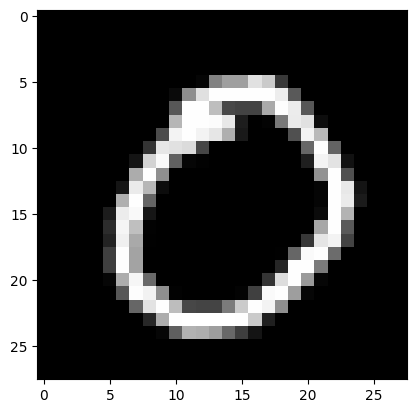

torch.Size([1642, 1, 28, 28])


In [9]:
image = X_2_a_k[6]
# plot the sample
fig = plt.figure
plt.imshow(image.squeeze(0), cmap='gray')
plt.show()
print(X_2_a_k.shape)

In [10]:
import sys
import os
sys.path
print(sys.path)
sys.path.append('/notebooks/AdversarialGMM/')

['c:\\Users\\lqs\\Downloads\\DeepCI\\notebooks', 'c:\\Python311\\python311.zip', 'c:\\Python311\\Lib', 'c:\\Python311\\DLLs', '', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Python311', 'c:\\Python311\\Lib\\site-packages']


In [11]:
device = torch.cuda.current_device() if torch.cuda.is_available() else None
print(torch.cuda.is_available())
print(device)

True
0


In [12]:
k = 256
n_hidden = 300
n_instruments = 1
dropout_p = 0.1

class Discriminator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.net_learner_supervised = torch.nn.Sequential(
            torch.nn.Linear(784, k), # input shape (batch, 784), output shape (batch, 1)
            torch.nn.BatchNorm1d(k), #
            torch.nn.LeakyReLU(0.2),
            torch.nn.Dropout(p=dropout_p),
            torch.nn.Linear(k, 256),
            torch.nn.BatchNorm1d(256),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(256, 10),
            torch.nn.Softmax(dim=1),
            )# input shape (batch, 784), output shape (batch, 1)
    def predict(self,x):# 输出为真的概率
        # print("x:",x.shape)
        ret = 1.0 - 1.0/(1.0 + torch.sum(torch.exp(x), dim=-1))
        # print("ret:",ret)
        return ret
    def forward(self, x):
        temp = self.net_learner_supervised(x) #shape is (batch, 10)
        confident = self.predict(temp)
        temp = torch.cat((temp, confident.unsqueeze(1)), dim=1)# shape is (batch, 11)(100, 11)
        # print("temp:",temp.shape)
        # print("temp:",temp)
        return temp

net_adversary = torch.nn.Sequential(
            torch.nn.Linear(4, k),
            torch.nn.BatchNorm1d(k),
            torch.nn.LeakyReLU(0.2),
            torch.nn.Linear(k, 256), #200
            torch.nn.BatchNorm1d(256),
            torch.nn.LeakyReLU(),
            nn.Dropout(p=0.1),                        
            torch.nn.Linear(256, 784),
            torch.nn.Tanh()
            )# input shape (batch, 1, 28, 28), output shape (batch, 1, 28, 28)
 

In [13]:
import torch.utils.data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       #transforms.Normalize((0.1307,), (0.3081,))
                       
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       #transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)

import torchvision.transforms as T
transform = T.Resize((32,32))

In [15]:
d = torch.Tensor(X_train[:100]).unsqueeze(1)

In [16]:
learner = Discriminator()

adversary = net_adversary

In [17]:
import torch
from torch.optim import optimizer
def train(epoch):
    all_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = data.to(device), target.to(device)
            
        data = data.float()
        data, target = Variable(data), Variable(target)
 
        optimizer.zero_grad()
        data = data.view(-1, 784)
        output = model(data)

        cls = output[:, :-1].to(device)
        confident = output[:, -1].to(device)
        loss_0 = F.cross_entropy(cls, target)
        loss_1 = torch.mean(torch.abs(confident - 0.5))# 0.5 is the threshold
        if(loss_1 > 0.5):# means the confident is too high and the model is not confident
            loss = loss_0 + loss_1
        else:# means the confident is too low and the model is confident
            loss = loss_0
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically. 
        all_loss += loss.item()
    all_loss /= bs # ？
    print('Train Epoch: {} \tLoss: {:.6f}'.format(
        epoch, all_loss))

def test(model):
    test_loss = 0
    correct = 0
    # print('test_loader: ', len(test_loader))
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data, target = Variable(data, volatile=True), Variable(target)
        data = torch.flatten(data, start_dim=1)
        # print('shape of target: ', target.shape)
        output = model(data)

        cls = output[:,:-1].to(device) # shape is (batch, 10)
        real = output[:,-1].to(device)# shape is (batch, 1)
        loss_0 = F.cross_entropy(cls, target)
        loss_1 = torch.mean(torch.abs(real - 0.5))
        test_loss += torch.mean(loss_0 + loss_1)
        
        pred = torch.argmax(cls, dim=1)
        correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= bs
    accuracy = correct / bs
    
    print("test_loss: ", test_loss.item(), "accuracy:", accuracy)

In [18]:
model = learner.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=1e-5)

for epoch in range(1, 30):#30
    train(epoch)
    test(model)

Train Epoch: 1 	Loss: 9.780678
test_loss:  0.9781950116157532 accuracy: 94.36
Train Epoch: 2 	Loss: 9.154752
test_loss:  0.9673618078231812 accuracy: 95.75
Train Epoch: 3 	Loss: 9.049805
test_loss:  0.9622806310653687 accuracy: 96.37
Train Epoch: 4 	Loss: 8.994974
test_loss:  0.9594264626502991 accuracy: 97.06
Train Epoch: 5 	Loss: 8.962307
test_loss:  0.9595277309417725 accuracy: 96.8
Train Epoch: 6 	Loss: 8.939535
test_loss:  0.9573891758918762 accuracy: 97.12
Train Epoch: 7 	Loss: 8.921015
test_loss:  0.9566269516944885 accuracy: 97.28
Train Epoch: 8 	Loss: 8.906188
test_loss:  0.9560209512710571 accuracy: 97.51
Train Epoch: 9 	Loss: 8.894135
test_loss:  0.9557316303253174 accuracy: 97.44
Train Epoch: 10 	Loss: 8.885239
test_loss:  0.9560859203338623 accuracy: 97.31
Train Epoch: 11 	Loss: 8.879893
test_loss:  0.9549229145050049 accuracy: 97.56
Train Epoch: 12 	Loss: 8.869062
test_loss:  0.9542928338050842 accuracy: 97.68
Train Epoch: 13 	Loss: 8.864971
test_loss:  0.9547641277313232

shape of X_2_a_k:  torch.Size([1642, 784])
test_loss:  0.9527703523635864 accuracy: 97.89
pred:  (1642,)
X_2_a_k_t:  torch.Size([1642, 1])


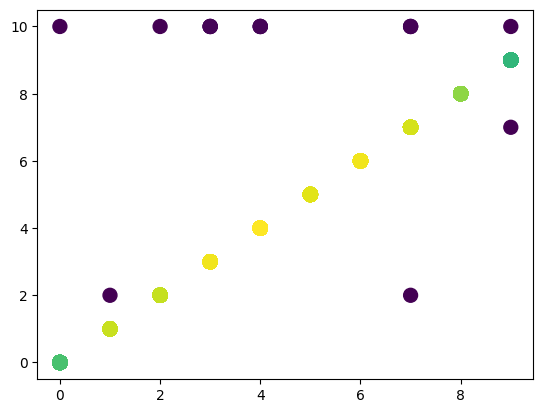

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
model_temp = learner #torch.load(os.path.join(res.model_dir,"epoch{}".format(res.n_epochs - 1)))
X_2_a_k = torch.flatten(X_2_a_k, start_dim=1)
print("shape of X_2_a_k: ", X_2_a_k.shape)
test(model_temp)
pred = model_temp(X_2_a_k.cuda()).cpu().data.numpy()
pred = np.argmax(pred, axis=1)
print("pred: ", pred.shape)
print("X_2_a_k_t: ", X_2_a_k_t.shape)
x = X_2_a_k_t.T.squeeze().cpu().data.numpy()
# calculate the density
xy = np.vstack([x,pred])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, pred, c = z, s = 100)
plt.show()

In [20]:
from model.adeepci import ADeepCI
res = ADeepCI(learner, adversary).fit(X_1_a_j, X_2_a_j, X_1_a_k, X_2_a_k, 
                  X_1_b_j, X_2_b_j, X_1_b_k, X_2_b_k, Z, X_2_a_j_t,X_2_a_k_t,X_2_b_j_t,X_2_b_k_t,
                  learner_l2=1e-3, adversary_l2=1e-3, adversary_norm_reg=1e-3,
                  learner_lr=0.0004, adversary_lr=0.0001, n_epochs=400, bs=bs, train_learner_every=1, train_adversary_every=8,
                  ols_weight=0.02, warm_start=True, logger=None, model_dir='.', device = device, verbose=False)

Initializing ADeepCI
BaseSupLossADeepCI: Training learner and adversary
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 3.747137660822159
Epoch 0, d_loss: 8.266072, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.0
Epoch 0, d_loss: 8.267191, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.6775527085821849
Epoch 0, d_loss: 8.537303, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.2145258477258686
Epoch 0, d_loss: 8.564239, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.0
Epoch 0, d_loss: 8.565312, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.0
Epoch 0, d_loss: 8.566422, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.23771205123975342
Epoch 0, d_loss: 8.599746, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.047996700232081066
Epoch 0, d_loss: 8.601196, g_loss: 0.040539 
torch.mean(torch.maximum(torch.tensor(0),-1*(m))) 0.0
Epoch

shape of X_2_a_k:  torch.Size([1642, 784])
test_loss:  0.9509089589118958 accuracy: 98.17
pred:  (1642,)
X_2_a_k_t:  torch.Size([1642, 1])


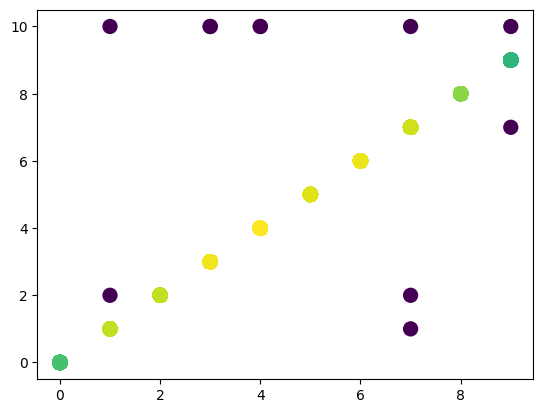

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
model_temp = learner #torch.load(os.path.join(res.model_dir,"epoch{}".format(res.n_epochs - 1)))
X_2_a_k = torch.flatten(X_2_a_k, start_dim=1)
print("shape of X_2_a_k: ", X_2_a_k.shape)
test(model_temp)
pred = model_temp(X_2_a_k.cuda()).cpu().data.numpy()
pred = np.argmax(pred, axis=1)
print("pred: ", pred.shape)
print("X_2_a_k_t: ", X_2_a_k_t.shape)
x = X_2_a_k_t.T.squeeze().cpu().data.numpy()
# calculate the density
xy = np.vstack([x,pred])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, pred, c = z, s = 100)
plt.show()

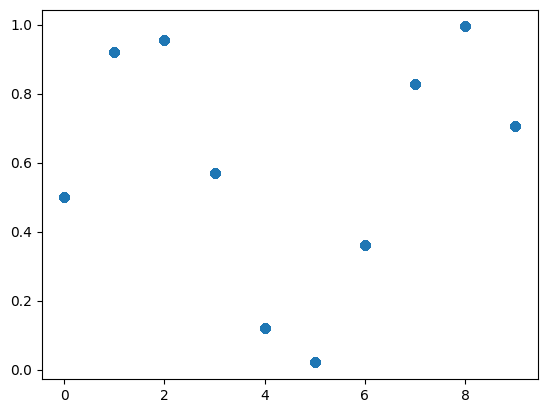

In [22]:
plt.scatter(X_2_a_k_t.T.squeeze().cpu().data.numpy(), aa(X_2_a_k_t).cpu().data.numpy(), cmap='Spectral_r')# plot the true function
plt.show()

In [23]:
import numpy as np

import statsmodels.api as sm

y = learner(X_2_a_k.cuda()).cpu().data.numpy()
x = aa(X_2_a_k_t).cpu().data.numpy()


In [24]:
print('shape of x: ', x.shape)
print('shape of X_2_a_k_t: ', X_2_a_k_t.shape)
# Fit and summarize OLS model
pred = np.argmax(y, axis=1)

mod = sm.OLS(pred,X_2_a_k_t.to(device).cpu().data.numpy())

print('shape of y: ', y.shape)

res = mod.fit()
print(res.summary())

shape of x:  (1642,)
shape of X_2_a_k_t:  torch.Size([1642, 1])
shape of y:  (1642, 11)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.297e+05
Date:                Wed, 17 May 2023   Prob (F-statistic):                        0.00
Time:                        01:45:12   Log-Likelihood:                         -1005.0
No. Observations:                1642   AIC:                                      2012.
Df Residuals:                    1641   BIC:                                      2017.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err